In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import configs
import tasks
import manifold_synthetic
import utils

from ripser import Rips
from persim import plot_diagrams, bottleneck

In [2]:
args = configs.arg_parse_for_notebook().parse_args("--experiment syn_circle --no-points 400 --data-noise 0.01 --sampler-noise 0.01".split())

---Generate circle data


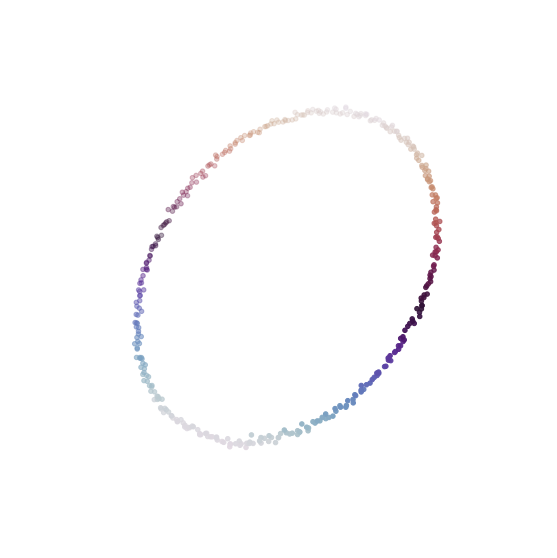

In [3]:
xdata, ydata, zdata, fig_name = tasks.gen_circle(args)
data = np.transpose(np.concatenate(([xdata],[ydata],[zdata]), axis=0))

In [4]:
manifold_sampler = manifold_synthetic.Manifold_Synthetic_Sampler(data)
manifold_G = manifold_sampler.get_G_from_data()
Gu, Gd, Gv = np.linalg.svd(manifold_G, full_matrices=False)

Finish initialization.


In [5]:
gauss_noise = np.random.normal(0, 1, size=manifold_sampler.data.shape)
plane_noise = np.zeros_like(gauss_noise)

for d in range(Gv.shape[0]):
    proj = np.dot(gauss_noise, Gv[d])
    for s in range(plane_noise.shape[0]):
        plane_noise[s] = plane_noise[s] + proj[s]*Gv[d]        
ortho_noise = gauss_noise - plane_noise

In [6]:
def viz_all_pc(pc,pc_g,pc_o,pc_p, name = 'shape'):
    
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    xdata = pc_g[:,0]
    ydata = pc_g[:,1]
    zdata = pc_g[:,2]
    ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='twilight');
    ax.axis('off')
    fig_name = "viz/" + name +"_gauss.png"
    plt.savefig(fig_name, transparent=True)
    
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    xdata = pc_o[:,0]
    ydata = pc_o[:,1]
    zdata = pc_o[:,2]
    ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='twilight');
    ax.axis('off')
    fig_name = "viz/" + name +"_ortho.png"
    plt.savefig(fig_name, transparent=True)
    
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    xdata = pc_p[:,0]
    ydata = pc_p[:,1]
    zdata = pc_p[:,2]
    ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='twilight');
    ax.axis('off')
    fig_name = "viz/" + name +"_plane.png"
    plt.savefig(fig_name, transparent=True)
    
    return

# RADIUS = args.sampler_noise
RADIUS = 10.0

# noise
ortho_norm = utils.normalize(ortho_noise, RADIUS)
plane_norm = utils.normalize(plane_noise, RADIUS)
gauss_norm = utils.normalize(gauss_noise, RADIUS)

# point clouds
ortho_pc = manifold_sampler.data + ortho_norm
plane_pc = manifold_sampler.data + plane_norm
gauss_pc = manifold_sampler.data + gauss_norm

In [25]:
norm_list = [np.linalg.norm(ortho_norm[i,:])**2 for i in range(400)]

In [28]:
np.mean(norm_list)

0.25000000000000006

In [17]:
np.linalg.norm(ortho_norm)

10.000000000000002

In [12]:
# viz_all_pc(gauss_pc,
#            ortho_pc,
#            plane_pc, 
#            name = 'circle')

In [12]:
rips = Rips()
diagrams_in = rips.fit_transform(manifold_sampler.data)
diagrams_gauss = rips.fit_transform(gauss_pc)
diagrams_plane = rips.fit_transform(plane_pc)
diagrams_ortho = rips.fit_transform(ortho_pc)

bottleneck_distances = (bottleneck(diagrams_in[0], diagrams_gauss[0]), bottleneck(diagrams_in[1], diagrams_gauss[1]),
                        bottleneck(diagrams_in[0], diagrams_plane[0]), bottleneck(diagrams_in[1], diagrams_plane[1]),
                        bottleneck(diagrams_in[0], diagrams_ortho[0]), bottleneck(diagrams_in[1], diagrams_ortho[1]))

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [21]:
bottleneck_distances = (bottleneck(diagrams_in[0], diagrams_gauss[0]), bottleneck(diagrams_in[1], diagrams_gauss[1]),
                        bottleneck(diagrams_in[0], diagrams_plane[0]), bottleneck(diagrams_in[1], diagrams_plane[1]),
                        bottleneck(diagrams_in[0], diagrams_ortho[0]), bottleneck(diagrams_in[1], diagrams_ortho[1]))

/home/minhvu/blue_minhvu/Python_geometric/lib/python3.8/site-packages/persim/bottleneck.py:56: UserWarning: dgm1 has points with non-finite death times;ignoring those points
  warnings.warn(
/home/minhvu/blue_minhvu/Python_geometric/lib/python3.8/site-packages/persim/bottleneck.py:66: UserWarning: dgm2 has points with non-finite death times;ignoring those points
  warnings.warn(


In [70]:
def viz_for_paper(pc, pc_g, pc_p, pc_o, H = None, name = 'shape', plot_size = 10):
    
    fig = plt.figure(figsize = (plot_size*4,plot_size))
    
    ax0 = fig.add_subplot(141, projection='3d')
    xdata = pc[:,0]
    ydata = pc[:,1]
    zdata = pc[:,2]
    ax0.scatter3D(xdata, ydata, zdata, c=zdata, cmap='twilight');
    ax0.axis('off')
    
    ax1 = fig.add_subplot(142, projection='3d')
    xdata = pc_g[:,0]
    ydata = pc_g[:,1]
    zdata = pc_g[:,2]
    ax1.scatter3D(xdata, ydata, zdata, c=zdata, cmap='twilight');
    ax1.axis('off')
    

    ax2 = fig.add_subplot(143, projection='3d')
    xdata = pc_p[:,0]
    ydata = pc_p[:,1]
    zdata = pc_p[:,2]
    ax2.scatter3D(xdata, ydata, zdata, c=zdata, cmap='twilight');
    ax2.axis('off')

    ax3 = fig.add_subplot(144, projection='3d')
    xdata = pc_o[:,0]
    ydata = pc_o[:,1]
    zdata = pc_o[:,2]
    ax3.scatter3D(xdata, ydata, zdata, c=zdata, cmap='twilight');
    ax3.axis('off')
    
    if H != None:
        t1 = "H0: " + "{:.4f}".format(H[0]) + " | H1: " + "{:.4f}".format(H[1])
        ax1.set_title(t1, y= 0.9, pad = 0)
        ax1.title.set_size(plot_size*2)
        t2 = "H0: " + "{:.4f}".format(H[2]) + " | H1: " + "{:.4f}".format(H[3])
        ax2.set_title(t2, y= 0.9, pad = 0)
        ax2.title.set_size(plot_size*2)
        t3 = "H0: " + "{:.4f}".format(H[4]) + " | H1: " + "{:.4f}".format(H[5])
        ax3.set_title(t3, y= 0.9, pad = 0)
        ax3.title.set_size(plot_size*2)
        
    fig_name = "viz/" + name +".png"
    plt.savefig(fig_name, transparent=True)
    
    return

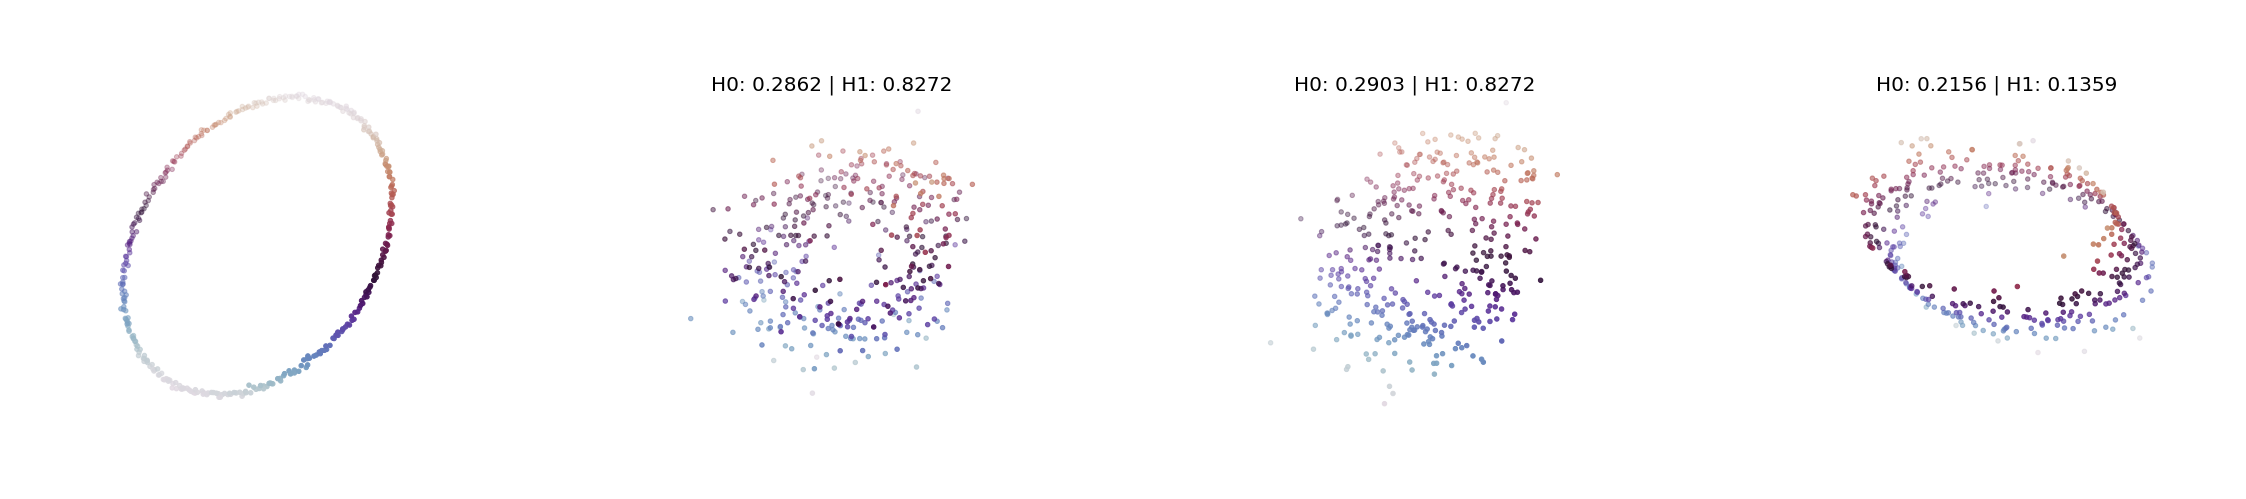

In [71]:
viz_for_paper(data, 
              gauss_pc,
              plane_pc,
              ortho_pc,
              H = bottleneck_distances,
              name = 'circle')

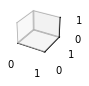

In [53]:
fig = plt.figure(figsize = (4,10))
ax0 = fig.add_subplot(141, projection='3d')

/tmp/ipykernel_188849/2011115505.py:17: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


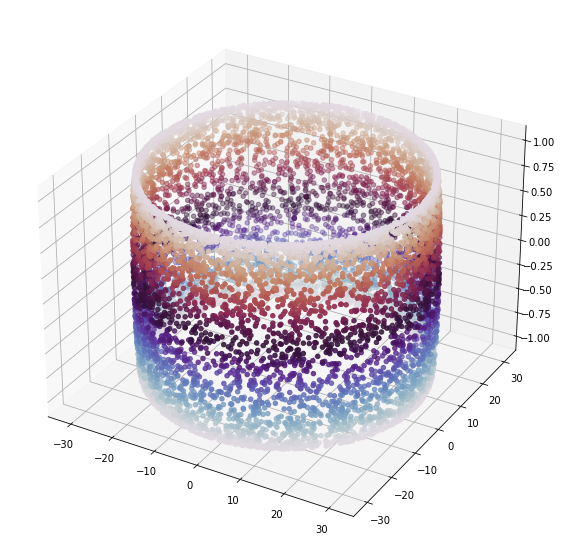

In [20]:
import numpy as np
import matplotlib.pyplot as plt


def plot_torus(precision, c, a):
    U = 2 * np.pi * np.random.rand(precision)
    V = 2 * np.pi * np.random.rand(precision)
    X = (c+a*np.cos(V))*np.cos(U)
    Y = (c+a*np.cos(V))*np.sin(U)
    Z = a*np.sin(V)
    return X, Y, Z


x, y, z = plot_torus(10000, 30, 1)

fig = plt.figure(figsize = (10,10))
ax = fig.gca(projection='3d')

ax.scatter3D(x, y, z, c=z, cmap='twilight');
plt.show()

In [2]:
x.shape

(100, 100)

In [3]:
y.shape

(100, 100)

In [7]:
R = 2
r = 1

angle = np.linspace(0, 2*np.pi, 32)
theta, phi = np.meshgrid(angle, angle)
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)  
Z = r * np.sin(phi)

In [8]:
X.shape

(32, 32)